In [1]:
import pandas as pd
import numpy as np
from IPython.core. interactiveshell import InteractiveShell


import matplotlib.pyplot as plt  #画图模块
from datetime import datetime   #时间模块

#输出矢量图 渲染矢量图 是一个魔法函数(magic functions)内嵌绘图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#画图方便
#矢量图
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data= pd.read_csv('C:\Users\ignorance\Desktop\Python\数据\000001.csv') 
data['Day']=pd.to_datetime(data['Day'],format = '%Y/%m/%d')
data.set_index('Day',inplace= True) 
data.sort_values(by=['Day'],axis=0,ascending=True)#axis=1??? True是升序

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1990-12-19,,96.05,99.98,95.79,99.98,126000,4.940000e+05
1990-12-20,99.98,104.30,104.39,99.98,104.39,19700,8.400000e+04
1990-12-21,104.39,109.07,109.13,103.73,109.13,2800,1.600000e+04
1990-12-24,109.13,113.57,114.55,109.13,114.55,3200,3.100000e+04
1990-12-25,114.55,120.09,120.25,114.55,120.25,1500,6.000000e+03
...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11


In [3]:
daily_data=data['1995-01':'2022-07'].copy()
daily_data['Close']=pd.to_numeric(daily_data['Close'])
daily_data['Preclose']=pd.to_numeric(daily_data['Preclose'])
daily_data['Raw_return']=daily_data['Close']/daily_data['Preclose']- 1
daily_data['Log_return']=np.log(daily_data['Close'])-np.log(daily_data['Preclose'])
daily_data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return,Log_return
Day,,,,,,,,,
1995-01-03,647.87,637.72,647.71,630.53,639.88,23451800,1.806930e+08,-0.012333,-0.012409
1995-01-04,639.88,641.90,655.51,638.86,653.81,42222000,3.069230e+08,0.021770,0.021536
1995-01-05,653.81,655.38,657.52,645.81,646.89,43012300,3.015330e+08,-0.010584,-0.010641
1995-01-06,646.89,642.75,643.89,636.33,640.76,48748200,3.537580e+08,-0.009476,-0.009521
1995-01-09,640.76,637.52,637.55,625.04,626.00,50985100,3.985190e+08,-0.023035,-0.023305
...,...,...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11,-0.005988,-0.006006
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11,0.008322,0.008288
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11,-0.000513,-0.000513


In [4]:
Month_data=daily_data.resample('M')['Log_return'].sum().to_frame()#resample('M')把日频度变成月频度 Q季度  Y年度
Month_data['Raw_return']=np.exp(Month_data['Log_return'])- 1
Month_data

,Log_return,Raw_return
Day,,
1995-01-31,-0.141139,-0.131631
1995-02-28,-0.023979,-0.023694
1995-03-31,0.163651,0.177803
1995-04-30,-0.109315,-0.103552
1995-05-31,0.188901,0.207922
...,...,...
2022-03-31,-0.062604,-0.060685
2022-04-30,-0.065154,-0.063077
2022-05-31,0.044724,0.045739


In [5]:
Quarter_data =daily_data.resample('Q')['Log_return'].sum().to_frame()
Quarter_data['Raw_return'] =np.exp(Quarter_data['Log_return'])-1
Quarter_data

,Log_return,Raw_return
Day,,
1995-03-31,-0.001467,-0.001466
1995-06-30,-0.025583,-0.025258
1995-09-30,0.135980,0.145660
1995-12-31,-0.263130,-0.231358
1996-03-31,0.001979,0.001981
...,...,...
2021-09-30,-0.006434,-0.006413
2021-12-31,0.019870,0.020069
2022-03-31,-0.112592,-0.106484


In [6]:
Year_data =daily_data.resample('Y')['Log_return'].sum().to_frame()
Year_data['Raw_return'] =np.exp(Year_data['Log_return'])-1
Year_data

,Log_return,Raw_return
Day,,
1995-12-31,-0.154200,-0.142899
1996-12-31,0.501639,0.651425
1997-12-31,0.264019,0.302153
1998-12-31,-0.040505,-0.039695
1999-12-31,0.175423,0.191750
2000-12-31,0.416917,0.517277
2001-12-31,-0.230898,-0.206180
2002-12-31,-0.192575,-0.175167
2003-12-31,0.097735,0.102670


描述性统计分析工作

描述性统计python工具;


count 统计非NA的数量;


describe 针对series或者DF的列计算和汇总;


min  max  最小值和最大值;


quantile  样本分位数;


sum    求和;


mean   均值;


median 中位数;


mad  根据均值计算平均绝对离差;


var  方差;


std 标准差;


skew  偏度(三阶矩);


kurt 峰度;


cumsum  累计和;


cumprod 累计乘积;


diff 一阶差分;


pct_change 计算百分比变化;


mode 计算众数;


cov 协方差;


corrcoef  相关系数;

-------------------------------------------

均值  mean

In [7]:
daily_data['2001-01':'2021-12']['Raw_return'].mean()

0.00022751850165965285

In [8]:
Month_data['2001-01':'2021-12']['Raw_return'].mean()

0.004956786303718885

In [9]:
np.mean(daily_data['2001-01':'2021-12']['Raw_return'])

0.00022751850165965285

In [10]:
sum(daily_data['2001-01':'2021-12']['Raw_return'])/len(daily_data['2001-01':'2021-12'])

0.00022751850165965285

In [11]:
daily_data['2001-01':'2021-12']['Raw_return'].describe().round(5)#round(n)小数点位

count    5093.00000
mean        0.00023
std         0.01528
min        -0.08841
25%        -0.00661
50%         0.00055
75%         0.00739
max         0.09857
Name: Raw_return, dtype: float64

分位数  quantile

In [12]:
from statistics import quantiles
quantiles(daily_data['2001-01':'2021-12']['Raw_return'],n=10,method='inclusive')

[-0.016157886187371084,
 -0.008743411646881217,
 -0.004860837545899566,
 -0.0017640474235892435,
 0.0005548408839641805,
 0.002756148985317708,
 0.005468000624198011,
 0.009474065359947348,
 0.017090165756289098]

In [13]:
quantiles(daily_data['2001-01':'2021-12']['Raw_return'],n=10,method='exclusive')

[-0.016159540419414233,
 -0.008749773599129873,
 -0.004862631005090679,
 -0.0017656292619215419,
 0.0005548408839641805,
 0.002757066310518708,
 0.005469855342927011,
 0.009478566240752339,
 0.01712351420708149]

In [14]:
quantiles(Month_data['2001-01':'2021-12']['Raw_return'],n=4)

[-0.03902151764035419, 0.0045688939046903965, 0.04376696290011545]

In [15]:
quantiles(Year_data['2001-01':'2021-12']['Raw_return'],n=6)

[-0.20970432710944145,
 -0.13644140191152035,
 0.03169471951696279,
 0.09982538676686732,
 0.6190692491238989]

In [16]:
arr=np.array([1,2,3,4,5,6,7,8,9,10,11,12])
np.quantile(arr,(0.25,0.50,0.75))

array([3.75, 6.5 , 9.25])

In [17]:
quantiles(arr,n=4,method='exclusive')

[3.25, 6.5, 9.75]

In [18]:
quantiles(arr,n=4,method='inclusive')

[3.75, 6.5, 9.25]

波动率 Variance

In [19]:
np.var(daily_data['2001-01':'2021-12']['Raw_return'])#var 方差

0.0002333270626262981

In [20]:
m=np.mean(daily_data['2001-01':'2021-12']['Raw_return'])
sum((daily_data['2001-01':'2021-12']['Raw_return']-m)**2)/len(daily_data['2001-01':'2021-12']['Raw_return'])

0.0002333270626262981

In [21]:
np.std(daily_data['2001-01':'2021-12']['Raw_return'])#标准差

0.015275047058071478

In [22]:
from math import sqrt
sqrt(np.var(daily_data['2001-01':'2021-12']['Raw_return']))#方差开平方=标准差

0.015275047058071478

股票月波动

用groupby

In [23]:
index2 = daily_data
index2['year']=index2.index.year
index2['month']=index2.index.month
index2

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return,Log_return,year,month
Day,,,,,,,,,,,
1995-01-03,647.87,637.72,647.71,630.53,639.88,23451800,1.806930e+08,-0.012333,-0.012409,1995,1
1995-01-04,639.88,641.90,655.51,638.86,653.81,42222000,3.069230e+08,0.021770,0.021536,1995,1
1995-01-05,653.81,655.38,657.52,645.81,646.89,43012300,3.015330e+08,-0.010584,-0.010641,1995,1
1995-01-06,646.89,642.75,643.89,636.33,640.76,48748200,3.537580e+08,-0.009476,-0.009521,1995,1
1995-01-09,640.76,637.52,637.55,625.04,626.00,50985100,3.985190e+08,-0.023035,-0.023305,1995,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,3269.97,3269.71,3273.18,3243.03,3250.39,27124574400,3.480000e+11,-0.005988,-0.006006,2022,7
2022-07-26,3250.39,3254.19,3282.41,3246.04,3277.44,25946867600,3.340000e+11,0.008322,0.008288,2022,7
2022-07-27,3277.44,3271.78,3282.57,3265.73,3275.76,24913148500,3.400000e+11,-0.000513,-0.000513,2022,7


In [24]:
Month_var=pd.DataFrame(index2.groupby(['year','month'])['Raw_return'].var())
Month_var.rename(columns={'Raw_return':'Variance'},inplace=True)
Month_var

Variance
year month          
1995 1      0.000260
     2      0.001130
     3      0.000551
     4      0.000407
     5      0.006924
...              ...
2022 3      0.000299
     4      0.000335
     5      0.000107
     6      0.000080
     7      0.000064

[331 rows x 1 columns]

用resample

In [25]:
monthly_var=daily_data.resample('m')['Raw_return'].var().to_frame()
monthly_var.rename(columns={'Raw_return':'Variance'},inplace=True)
monthly_var

,Variance
Day,
1995-01-31,0.000260
1995-02-28,0.001130
1995-03-31,0.000551
1995-04-30,0.000407
1995-05-31,0.006924
...,...
2022-03-31,0.000299
2022-04-30,0.000335
2022-05-31,0.000107


In [26]:
daily_data['1995-01':'2021-12']['Raw_return'].skew()#偏度
daily_data['1995-01':'2021-12']['Raw_return'].kurt()#峰度



0.6863037895353762

22.6381518680142

In [27]:
Month_data['1995-01':'2021-12']['Raw_return'].skew()#偏度
Month_data['1995-01':'2021-12']['Raw_return'].kurt()#峰度

0.28015251490360515

1.7855239720284053

In [28]:
Quarter_data['1995-01':'2021-12']['Raw_return'].skew()
Quarter_data['1995-01':'2021-12']['Raw_return'].kurt()

0.8072695404646988

1.4044422852380039

In [29]:

Year_data['1995-01':'2021-12']['Raw_return'].skew()
Year_data['1995-01':'2021-12']['Raw_return'].kurt()

1.0519126400191903

1.3183721805823527

偏度由负变正，峰度由高变低

In [30]:
result= np.random.normal(0,1,1000000)#生成高斯分布的概率密度随机数
result

array([ 1.48111791, -1.10504929, -0.3698832 , ..., -0.8175778 ,
        1.30114552, -0.375655  ])

标准正态分布的直方图

In [31]:
#np.arrange
#函数返回一个有终点和起点的固定步长发排列，如【1，2，3，4，5】
#参数个数情况，np.arrange()分为一个参数，两个参数，三个参数三种情况
# 1)一个参数时,参数值为终点，起点取默认值0，步长取默认值1.
#2）两个参数时，第一个参数为起点。第二个参数为终点，步长取默认值1。
# 3）三个参数时，第一个参数为起点，第二个参数为终点，第三个参数为步长。其中步长支持小数

CPU times: total: 188 ms
Wall time: 200 ms


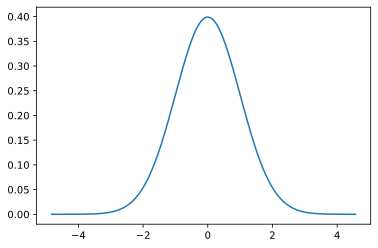

In [32]:
%%time
#根据均值、标准差，求指定范围的正态分布概率值
def normfun(x,mu,sigma):#定义正态分布密度函数
    pdf=np.exp(-((x-mu)**2)/(2*sigma**2))/(sigma * np.sqrt(2*np.pi))
    return pdf

result= np.random.normal(0,1,1000000)

x= np.arange(min(result),max(result),0.01)#设定x,y

y= normfun(x,result.mean(),result.std())
plt.plot(x,y)#画出理论正态分布概率曲线

标准正态分布的直方图

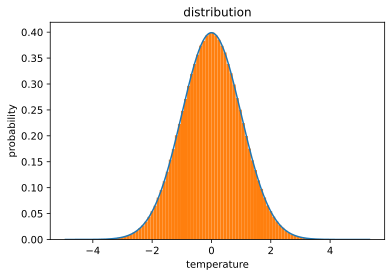

CPU times: total: 422 ms
Wall time: 418 ms


In [33]:
%%time
#根据均值、标准差，求指定范围的正态分布概率值

def normfun(x,mu,sigma):
    pdf=np.exp(-((x-mu)**2)/(2*sigma**2))/(sigma * np.sqrt(2*np.pi))
    return pdf

result= np.random.normal(0,1,1000000)

x= np.arange(min(result),max(result),0.01)#设定x,y

y= normfun(x,result.mean(),result.std())
plt.plot(x,y)#画出理论正态分布概率曲线
#这里画出实际概率的参数概率与取值关系
fig=plt.hist(result,bins=100,rwidth=1,density=True)#bins个柱状图，宽度是rwidth(0-1)，=1没有缝隙
plt.title('distribution')
plt.xlabel ('temperature')
plt.ylabel ('probability')

plt.show()

在日收益率直方图上添加正态分布密度曲线

CPU times: total: 672 ms
Wall time: 679 ms


Text(0, 0.5, 'Probability')

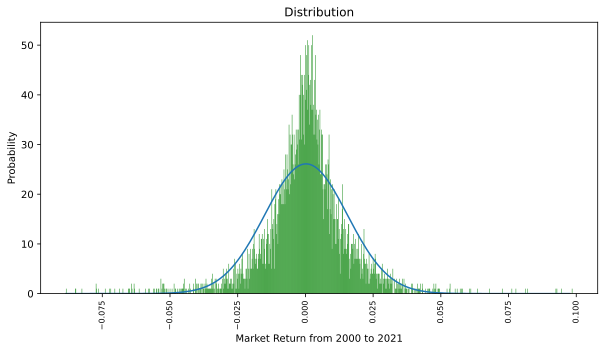

In [34]:
%%time
retmean = daily_data['2001-01':'2021-12']['Raw_return'].mean()
retstd = daily_data['2001-01':'2021-12']['Raw_return'].std()
retmin = daily_data['2001-01':'2021-12']['Raw_return'].min()
retmax = daily_data['2001-01':'2021-12']['Raw_return'].max()

def normfun(x,mu,sigma):
    pdf=np.exp(-((x-mu)**2)/(2*sigma**2))/(sigma * np.sqrt(2*np.pi))
    return pdf

x=np.arange(retmin,retmax,0.001)#0.001 0.002 0.003 0.004.....0.099 0.100 0.101
y=normfun(x,retmean,retstd)
fig=plt.figure(figsize=(10,5))

plt.plot(x,y)

fig=plt.hist(daily_data['2001-01':'2021-12']['Raw_return'],
            bins=1000,
            histtype='bar',
            color='g',
            alpha=0.9)
plt.xticks(rotation=90,fontsize=8)
plt.title('Distribution')
plt.xlabel('Market Return from 2000 to 2021')
plt.ylabel('Probability')

在月收益率直方图上添加正态分布密度曲线

CPU times: total: 78.1 ms
Wall time: 78.8 ms


Text(0, 0.5, 'Probability')

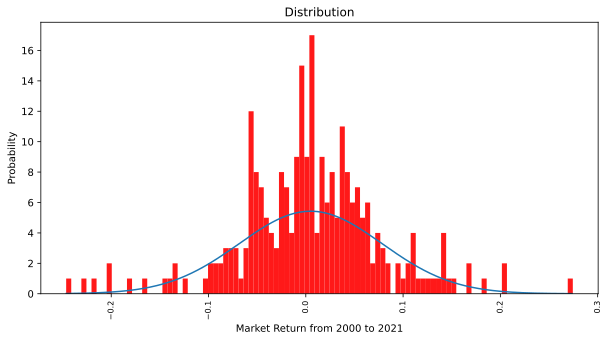

In [35]:
%%time
retmean = Month_data['2001-01':'2021-12']['Raw_return'].mean()
retstd = Month_data['2001-01':'2021-12']['Raw_return'].std()
retmin = Month_data['2001-01':'2021-12']['Raw_return'].min()
retmax = Month_data['2001-01':'2021-12']['Raw_return'].max()
def normfun(x,mu,sigma):
    pdf=np.exp(-((x-mu)**2)/(2*sigma**2))/(sigma * np.sqrt(2*np.pi))
    return pdf

x=np.arange(retmin,retmax,0.001)#0.001 0.002 0.003 0.004.....0.099 0.100 0.101
y=normfun(x,retmean,retstd)
fig=plt.figure(figsize=(10,5))

plt.plot(x,y)

fig=plt.hist(Month_data['2001-01':'2021-12']['Raw_return'],
            bins=100,#bins数量跟时间的数量有关
            histtype='bar',
            color='r',
            alpha=0.9)
plt.xticks(rotation=90,fontsize=8)
plt.title('Distribution')
plt.xlabel('Market Return from 2000 to 2021')
plt.ylabel('Probability')

平稳性 stationary

In [36]:
from statsmodels.tsa.stattools import adfuller as ADF
print('原始序列的ADF检验结果为:',ADF(daily_data['2001-01':'2021-12']['Raw_return']))
#一个统计量越大越好(有负的那就绝对值越大越好)

原始序列的ADF检验结果为: (-16.817803290459846, 1.1849007374474352e-29, 14, 5078, {'1%': -3.4316384223538003, '5%': -2.8621093452827115, '10%': -2.567073062853592}, -27970.08448045345)
